In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)

In [28]:
df = pd.read_csv('./data/survata_results.csv', low_memory=False)

In [29]:
df.shape

(242, 67)

## How much outstanding credit card debt do the survey participants have?

In [30]:
def bucketize_debt(x):
    if x < 500:
        bucket = '0 to 499'
    elif x < 1000:
        bucket = '500 to 999'
    elif x < 5000:
        bucket = '1,000 to 4,999'
    elif x < 10000:
        bucket = '5,000 to 9,999'
    else:
        bucket = '>= 10,000'
    return bucket
df['debt_amount'] = df['Approximately how much credit card debt do you have (in US $)?'].apply(bucketize_debt)

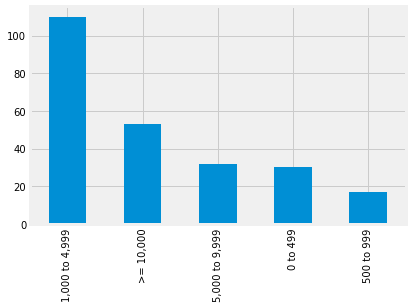

In [31]:
df.debt_amount.value_counts().plot(kind='bar');

### Why haven't they dealt with it?

In [60]:
df.groupby(['debt_amount'])[['Do not have the time', 'Waiting for some money to come in', 'Do not want to deal with it now', 'Seems like a lot of work', 'Do not know how to deal with it', "I don't know"]].sum()

,Do not have the time,Waiting for some money to come in,Do not want to deal with it now,Seems like a lot of work,Do not know how to deal with it,I don't know
debt_amount,,,,,,
0 to 499,1,11,3,2,1,3
"1,000 to 4,999",9,64,5,7,13,1
"5,000 to 9,999",0,10,4,2,4,2
500 to 999,1,7,1,0,3,1
">= 10,000",2,21,1,4,14,1


### How much does it bother them?

In [68]:
df.groupby(['debt_amount'])['On a scale of 1 to 5, how much does your credit card debt bother you? (Out of 5)'].mean().sort_values()

debt_amount
0 to 499          2.900000
500 to 999        3.411765
1,000 to 4,999    3.509091
5,000 to 9,999    4.093750
>= 10,000         4.358491
Name: On a scale of 1 to 5, how much does your credit card debt bother you? (Out of 5), dtype: float64

As expected, the higher the debt, the more it bothers someone

### How long have they been carrying this debt?

In [76]:
pd.crosstab(df.debt_amount, df['For how long have you been carrying this credit card debt?'])

For how long have you been carrying this credit card debt?,1 to 2 years,1 to 3 months,2 to 4 years,3 to 6 months,6 months to 1 year,More than 4 years
debt_amount,,,,,,
0 to 499,4,12,1,8,4,1
"1,000 to 4,999",24,14,11,20,31,10
"5,000 to 9,999",11,0,3,6,7,5
500 to 999,4,5,1,3,2,2
">= 10,000",14,2,9,2,14,12


### How do they plan on paying it down?

In [75]:
pd.crosstab(df.debt_amount, df['How do you plan to pay down your credit card debt (Select the closest that applies)?'])

How do you plan to pay down your credit card debt (Select the closest that applies)?,A debt consolidation loan,I have no concrete plan to pay it off,Other: Dave Ramsey,Other: Strategizing income and expenses,Other: When I get a job,Pay a fixed amount every month,Whenever I feel I have some extra money,With a bonus from work,With my tax refund
debt_amount,,,,,,,,,
0 to 499,0,4,0,0,0,10,8,3,5
"1,000 to 4,999",1,11,1,0,1,42,18,8,28
"5,000 to 9,999",2,6,0,1,0,8,7,2,6
500 to 999,0,3,0,0,0,5,0,2,7
">= 10,000",2,10,0,0,0,15,11,5,10
